In [1]:
from analysis.utils import *
from analysis.probabilities import *
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
import numpy as np

In [2]:
apple = 'AAPL'
microsoft = 'MSFT'
google = 'GOOG'

apple_df = pd.read_csv(f'data/{apple}.csv')
microsoft_df = pd.read_csv(f'data/{microsoft}.csv')
google_df = pd.read_csv(f'data/{google}.csv')

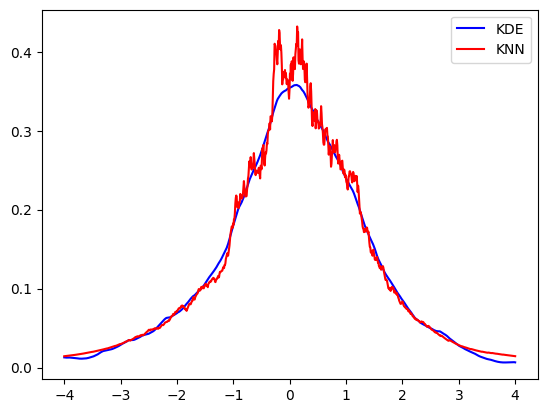

In [11]:
# test of desnity for one random variable
returns = np.array([apple_df['Returns']]).transpose()

kde = KDE(kernel='exponential', bandwidth='silverman')
knn = KNN(100)

pdf_kde = pdf_joint(kde, returns)
pdf_knn = pdf_joint(knn, returns)

# print density distributions
x_vals = np.linspace(-4, 4, 1000)
y_kde = [pdf_kde(x) for x in x_vals]
y_knn = [pdf_knn(x) for x in x_vals]

plt.plot(x_vals, y_kde, label='KDE', color='blue')
plt.plot(x_vals, y_knn, label='KNN', color='red')
plt.legend()
plt.show()

In [5]:
# test of desnity for multiple random variable
returns = np.array([apple_df['Returns'], google_df['Returns']]).transpose()

kde = KDE(kernel='exponential', bandwidth='silverman')
knn = KNN(100)

pdf_kde = pdf(kde, returns)
pdf_knn = pdf(knn, returns)

print(pdf_kde(2, 2))
print(pdf_knn(2, 2))

0.021776722525108032
0.023638627057082966


In [6]:
joint = np.array([apple_df['Returns']]).transpose()
cond = np.array([google_df['Returns']]).transpose()

pdf_kde = pdf(kde, joint, cond)
pdf_knn = pdf(knn, joint, cond)

# tuple = (1,2,3,4,5)
# print(list(tuple))

print(pdf_kde(2, 2))
print(pdf_knn(2, 2))

0.24477075851600108
0.27946931492360017


clean_up()